# More Important Functions

In [1]:
# value_counts
# sort_values
# rank
# sort index
# set index
# rename index -> rename
# reset index
# unique & nunique
# isnull/notnull/hasnans
# dropna
# fillna
# drop_duplicates
# drop
# apply
# isin
# corr
# nlargest -> nsmallest
# insert
# copy

In [2]:
import numpy as np
import pandas as pd

In [4]:
a = pd.Series([1,1,1,2,2,3])
a.value_counts()

1    3
2    2
3    1
dtype: int64

In [163]:
# value_counts(series and dataframe)

marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])

marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [6]:
marks.value_counts()

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
dtype: int64

In [8]:
ipl = pd.read_csv('ipl-matches.csv')
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [16]:
# find which player has won most potm => in finals and qualifiers
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts().head()

KA Pollard      3
F du Plessis    3
SK Raina        3
A Kumble        2
MK Pandey       2
Name: Player_of_Match, dtype: int64

<AxesSubplot:ylabel='TossDecision'>

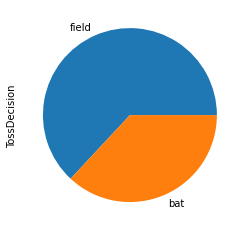

In [21]:
# Toss Decision Plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [27]:
# how many matches each team has played
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

In [28]:
# sort_values(series and dataframe) -> ascending -> na_position -> inplace -> multiple cols
# series

x = pd.Series([12,14,1,56,89])
x.sort_values(ascending=False)

4    89
3    56
1    14
0    12
2     1
dtype: int64

In [30]:
movies = pd.read_csv('movies.csv')
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [35]:
movies.sort_values('title_x',ascending=False).head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [146]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [38]:
# even though it is in decending order nan will be last
students.sort_values('name',ascending=False)

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [40]:
students.sort_values('name',ascending=False,na_position='first',inplace=True)
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [41]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [43]:
# on multiple colums by year and alphabetical
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


In [86]:
# rank(series)
batsman = pd.read_csv('batsman_runs_ipl.csv')
batsman.head()

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


In [87]:
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [88]:
# sort_index(series and dataframe)

In [89]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [90]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [91]:
movies.sort_index(ascending=False).head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [92]:
# set_index(dataframe) -> inplace
# only works on dataframe
batsman.set_index('batter',inplace=True)
batsman

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [93]:
# reset_index(series + dataframe) -> inplace
batsman.reset_index(inplace=True)

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [95]:
# how to replce existing index without loosing the previous index
batsman.reset_index().set_index('batting_rank')

,batter,batsman_run
batting_rank,,
166.5,A Ashish Reddy,280
226.0,A Badoni,161
535.0,A Chandila,4
329.0,A Chopra,53
402.5,A Choudhary,25
...,...,...
594.0,Yash Dayal,0
343.0,Yashpal Singh,47
547.5,Younis Khan,3


In [97]:
# series to dataframe using reset_index, it turns the series into dataframe
marks_series.reset_index()

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


In [98]:
# rename(dataframe) -> index
movies.set_index('title_x',inplace = True)

In [101]:
movies.rename(columns = {'imdb_id':'imdb','poster_path':'link'},inplace=True)
movies.head()

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [104]:
movies.rename(index={'Uri: The Surgical Strike':'Uri','Battalion 609':
                    'Battalion'}).head()

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [107]:
# unique(series)
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
temp.unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [110]:
len(ipl.Season.unique())

15

In [111]:
# nunique(series + dataframe) -> does not count nan -> dropna parameter
ipl['Season'].nunique()

15

In [114]:
print(len(temp.unique()))
# nunique don't count nan values
print(temp.nunique())

6
5


In [119]:
# isnull(series + dataframe)
students.name[students.name.isnull()]

3    NaN
5    NaN
7    NaN
9    NaN
Name: name, dtype: object

In [120]:
# notnull(series + dataframe)
students.name[students.name.notnull()]

2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [123]:
# hasnans(series)
students['name'].hasnans

True

In [124]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [125]:
students.isnull()

,name,college,branch,cgpa,package
3,True,True,True,True,True
5,True,False,False,False,False
7,True,True,False,False,False
9,True,False,True,True,True
2,False,False,False,False,False
6,False,False,False,False,False
0,False,False,False,False,False
4,False,True,False,False,False
1,False,False,False,False,False
8,False,True,False,False,True


In [126]:
students.notnull()

,name,college,branch,cgpa,package
3,False,False,False,False,False
5,False,True,True,True,True
7,False,False,True,True,True
9,False,True,False,False,False
2,True,True,True,True,True
6,True,True,True,True,True
0,True,True,True,True,True
4,True,False,True,True,True
1,True,True,True,True,True
8,True,False,True,True,False


In [148]:
# dropna(series + dataframe) -> how parameter -> works like or
students['name'].dropna()

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [149]:
students.dropna(how='any') # how is default to 'any'

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [150]:
students.dropna(how = 'all') # if all the row is nan

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [151]:
students.dropna(subset='name') # only in name column if nan exist

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


In [152]:
students.dropna(subset=['name','college']) # remove rows from these 2 columns

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [153]:
# fillna(series + dataframe)
students['name'].fillna('unknown')

0        nitish
1         ankit
2        rupesh
3       unknown
4    mrityunjay
5       unknown
6       rishabh
7       unknown
8        aditya
9       unknown
Name: name, dtype: object

In [154]:
students.fillna(0)

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,0,0,0,0.00,0.0
4,mrityunjay,0,me,5.60,6.0
5,0,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,0,0,cse,10.00,9.0
8,aditya,0,bio,7.40,0.0
9,0,git,0,0.00,0.0


In [155]:
students['package'].fillna(students['package'].mean())

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

In [160]:
students['name'].fillna(method='bfill')

0        nitish
1         ankit
2        rupesh
3    mrityunjay
4    mrityunjay
5       rishabh
6       rishabh
7        aditya
8        aditya
9           NaN
Name: name, dtype: object

In [167]:
# drop_duplicates(series + dataframe) -> works like and -> duplicated()
marks.duplicated().sum()

1

In [168]:
temp = pd.Series([1,1,1,2,3,3,4,4])
temp.drop_duplicates()

0    1
3    2
4    3
6    4
dtype: int64

In [169]:
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [171]:
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


In [174]:
# find the last match played by virat kohli in Delhi
ipl['all_player'] = ipl['Team1Players'] + ipl['Team2Players']
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_player
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ..."


In [177]:
def did_kohli_play(player_list):
    return 'V Kohli' in player_list

In [181]:
ipl['did_kohli_play'] = ipl['all_player'].apply(did_kohli_play)
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_player,did_kohli_play
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",False
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",True


In [184]:
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_play'] == True)].drop_duplicates(subset=['City','did_kohli_play'],keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_player,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [185]:
# drop(series + dataframe)
temp = pd.Series([10,2,3,16,45,78,10])
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [186]:
temp.drop(index=[0,6])

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [187]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [188]:
students.drop(columns=['branch','cgpa'])

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


In [189]:
students.drop(index=[0,8])

,name,college,branch,cgpa,package
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [193]:
students.set_index('name').drop(index=['nitish','aditya'])

,college,branch,cgpa,package
name,,,,
ankit,iit,it,8.25,5.0
rupesh,vit,cse,6.41,6.0
NaN,NaN,NaN,NaN,NaN
mrityunjay,NaN,me,5.60,6.0
NaN,vlsi,ce,9.00,7.0
rishabh,ssit,civ,7.40,8.0
NaN,NaN,cse,10.00,9.0
NaN,git,NaN,NaN,NaN


In [203]:
# apply(series + dataframe)
temp = pd.Series([10,20,30,40,50])
temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [204]:
def sigmoid(value):
    return 1/1+np.exp(-value)

In [205]:
temp.apply(sigmoid)

0    1.000045
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [206]:
points_df = pd.DataFrame(
    {
        '1st point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [212]:
def euclidean(row):
    pt_A = row['1st point']
    pt_B = row['2nd point']    
    
    return ((pt_A[0]-pt_B[0])**2 + (pt_A[1]-pt_B[1])**2)**0.5


In [213]:
points_df['distance'] = points_df.apply(euclidean,axis=1)
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
